In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D,Dropout,MaxPooling2D,Attention,Conv2D,concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import Xception,VGG16,VGG19,MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Layer, MultiHeadAttention
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LeakyReLU
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

/tmp/ipykernel_139610/96140691.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
train_path="Dataset/Train"
test_path="Dataset/Test"
val_path="Dataset/Validation"

In [3]:
train_datagen = ImageDataGenerator( 
                                   rescale=1./255,
                                   #rotation_range=20,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   #horizontal_flip=True,
                                  ) 
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(  rescale=1./255.0)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (299,299),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (299,299),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle=False)
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (299,299),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 140002 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


In [5]:
#Implement the MODEL

#base_model = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

#x = base_model.output
#x = GlobalAveragePooling2D()(x)
#predictions = Dense(1, activation='sigmoid')(x)  # Single unit for binary classification

#combined_model = Model(inputs=base_model.input, outputs=predictions)

#for layer in base_model.layers:
    #layer.trainable = False
#for layer in base_model.layers[-20:]:
    #layer.trainable = True

In [4]:
# Define your data input shape
input_shape = (299, 299, 3)  # Adjust according to your dataset

# Load the Xception model without the top layer (fully connected layer)
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True
# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
combined_model = Model(inputs=base_model.input, outputs=predictions)

2024-04-27 18:15:02.359557: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 18:15:02.510421: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20724 MB memory:  -> device: 0, name: NVIDIA A10, pci bus id: 0000:3b:00.0, compute capability: 8.6


In [5]:
combined_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [6]:
learning_rate = 0.000001  # You can set your desired learning rate value

# Create an Adam optimizer instance with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)


In [7]:
combined_model.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
history = combined_model.fit(
    training_set,
    epochs=10,
    validation_data=val_set,
    #callbacks=[callbacks]
)

Epoch 1/10


2024-04-27 18:15:25.354332: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8600
2024-04-27 18:15:26.047822: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


4376/4376 [==============================] - 526s 119ms/step - loss: 0.6129 - accuracy: 0.6762 - val_loss: 0.4959 - val_accuracy: 0.7809
Epoch 2/10
4376/4376 [==============================] - 829s 189ms/step - loss: 0.4219 - accuracy: 0.8150 - val_loss: 0.3847 - val_accuracy: 0.8314
Epoch 3/10
4376/4376 [==============================] - 848s 194ms/step - loss: 0.3248 - accuracy: 0.8644 - val_loss: 0.3336 - val_accuracy: 0.8538
Epoch 4/10
4376/4376 [==============================] - 850s 194ms/step - loss: 0.2693 - accuracy: 0.8893 - val_loss: 0.3023 - val_accuracy: 0.8690
Epoch 5/10
4376/4376 [==============================] - 847s 194ms/step - loss: 0.2350 - accuracy: 0.9044 - val_loss: 0.2828 - val_accuracy: 0.8776
Epoch 6/10
4376/4376 [==============================] - 848s 194ms/step - loss: 0.2128 - accuracy: 0.9139 - val_loss: 0.2665 - val_accuracy: 0.8850
Epoch 7/10
4376/4376 [==============================] - 848s 194ms/step - loss: 0.1949 - accuracy: 0.9223 - val_loss: 0.252

In [9]:
combined_model.save("Xception.h5")

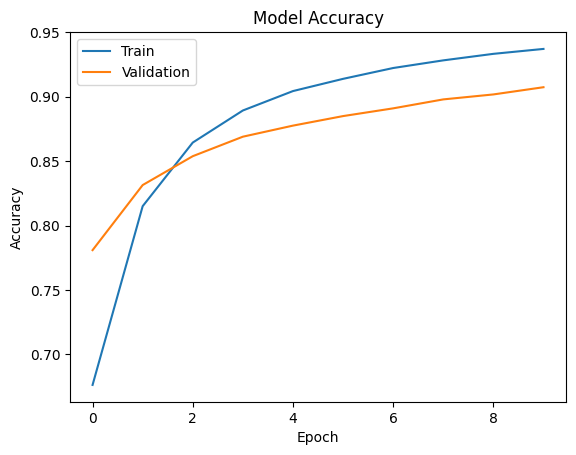

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

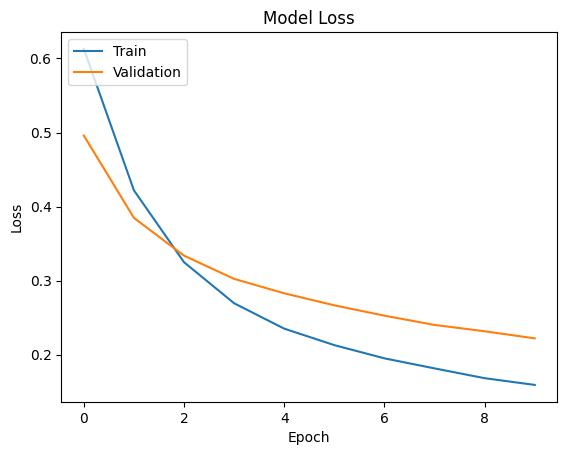

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
# Predict the classes using the test set
test_pred = combined_model.predict(test_set)
test_pred_classes = np.round(test_pred)

# Get the true classes of the test set
test_true_classes = test_set.classes

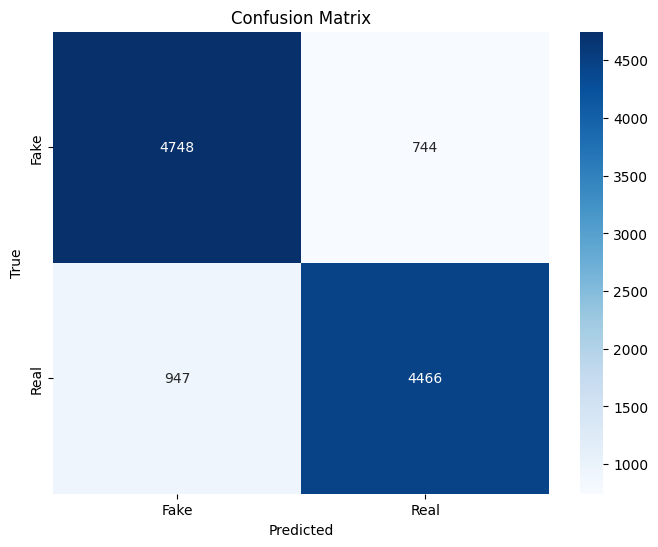

In [13]:
# Plot confusion matrix as a heatmap
# Generate confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
evaluation = combined_model.evaluate(test_set)

341/341 [==============================] - 29s 86ms/step - loss: 0.3615 - accuracy: 0.8449


In [15]:
print("Test Accuracy: {:.2f}%".format(evaluation[1] * 100))

Test Accuracy: 84.49%


In [16]:
#Classification report
report = classification_report(test_true_classes, test_pred_classes, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0     0.8337    0.8645    0.8488      5492
     Class 1     0.8572    0.8251    0.8408      5413

    accuracy                         0.8449     10905
   macro avg     0.8455    0.8448    0.8448     10905
weighted avg     0.8454    0.8449    0.8449     10905



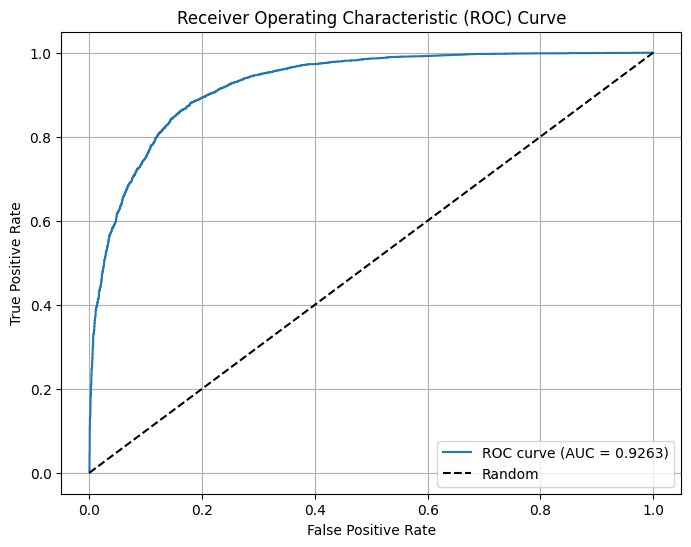

In [17]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_true_classes, test_pred)

# Calculate AUC
auc = roc_auc_score(test_true_classes, test_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

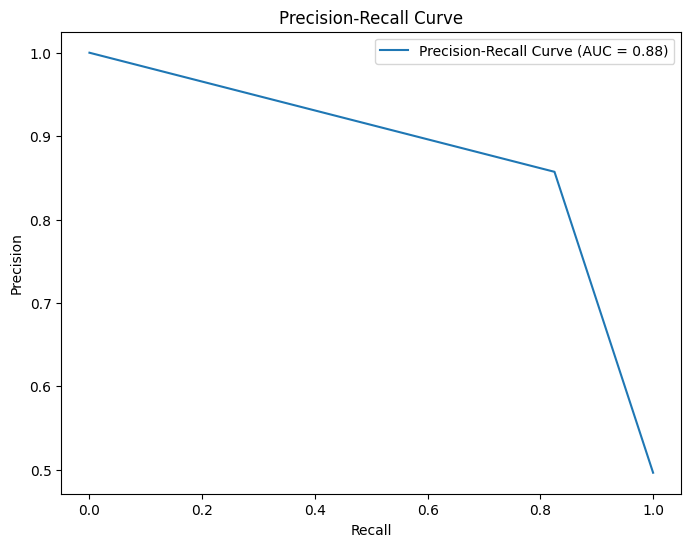

In [18]:
from sklearn.metrics import precision_recall_curve, auc
# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(test_true_classes, test_pred_classes)

# Calculate the area under the precision-recall curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [19]:
# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(test_true_classes, test_pred_classes).ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensitivity (True Positive Rate): {sensitivity:.4f}')
print(f'Specificity (True Negative Rate): {specificity:.4f}')

Sensitivity (True Positive Rate): 0.8251
Specificity (True Negative Rate): 0.8645


In [20]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Assuming you have obtained test_pred_classes and test_true_classes as described earlier

# Calculate F1 score for the test classes
f1 = f1_score(test_true_classes, test_pred_classes)
# Calculate accuracy to get error rate
accuracy = accuracy_score(test_true_classes, test_pred_classes)
error_rate = 1 - accuracy
# Calculate G-mean
g_mean = (sensitivity * specificity) ** 0.5

# Calculate F-measure
f_measure = 2 * ((sensitivity * specificity) / (sensitivity + specificity))

print(f'F1 Score: {f1:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'G-mean: {g_mean:.4f}')
print(f'F-measure: {f_measure:.4f}')

F1 Score: 0.8408
Error Rate: 0.1551
G-mean: 0.8446
F-measure: 0.8443
